In [1]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

2022-11-06 16:52:57.340160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
traindata = pd.read_csv('sign_mnist_train.csv')

In [3]:
trainlabel=traindata['label'].values

In [4]:
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

In [5]:
trainimages=trainimages.reshape(-1,28,28,1)

In [6]:
testdata = pd.read_csv('sign_mnist_test.csv')

In [7]:
testlabel=testdata['label'].values

In [8]:
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [9]:
testimages=testimages.reshape(-1,28,28,1)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
traingen=ImageDataGenerator(rotation_range=40,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                  shear_range=0.2,horizontal_flip=True,rescale=1/255.0,validation_split=0.2)

In [12]:
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')

In [13]:
testgen=ImageDataGenerator(rescale=1/255.0)
testdata_generator = testgen.flow(testimages,testlabel)

In [14]:
#usingdropoutlayerwithvalue0.2 
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
# model.add(Conv2D(64,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
# model.add(Conv2D(128,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
# model.add(Conv2D(128,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(26,activation="softmax"))



2022-11-06 16:55:21.737390: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 128)      512       
 hNormalization)                                                 
                                                        

In [17]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 100.0% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [18]:
history=model.fit(traindata_generator,epochs=60,validation_data=validationdata_generator,callbacks=[callback])

Epoch 1/60
687/687 [==============================] - 22s 30ms/step - loss: 2.3283 - accuracy: 0.3004 - val_loss: 2.1197 - val_accuracy: 0.3178
Epoch 2/60
687/687 [==============================] - 18s 27ms/step - loss: 1.4378 - accuracy: 0.5312 - val_loss: 2.1916 - val_accuracy: 0.3830
Epoch 3/60
687/687 [==============================] - 18s 27ms/step - loss: 1.1330 - accuracy: 0.6252 - val_loss: 2.1042 - val_accuracy: 0.4367
Epoch 4/60
687/687 [==============================] - 18s 27ms/step - loss: 0.9621 - accuracy: 0.6763 - val_loss: 2.0944 - val_accuracy: 0.4094
Epoch 5/60
687/687 [==============================] - 50s 74ms/step - loss: 0.8409 - accuracy: 0.7182 - val_loss: 1.0970 - val_accuracy: 0.6325
Epoch 6/60
687/687 [==============================] - 19s 27ms/step - loss: 0.7485 - accuracy: 0.7487 - val_loss: 0.8452 - val_accuracy: 0.7157
Epoch 7/60
687/687 [==============================] - 18s 26ms/step - loss: 0.6977 - accuracy: 0.7665 - val_loss: 0.7600 - val_accuracy:

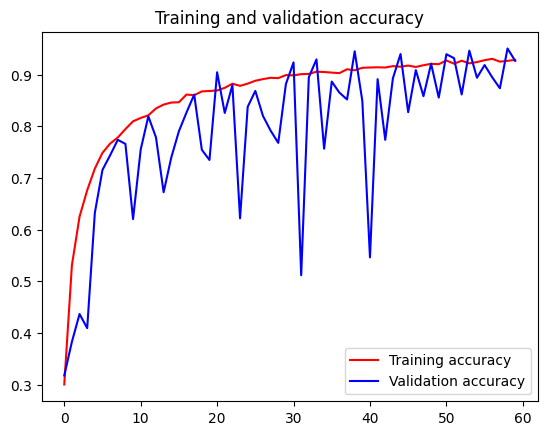

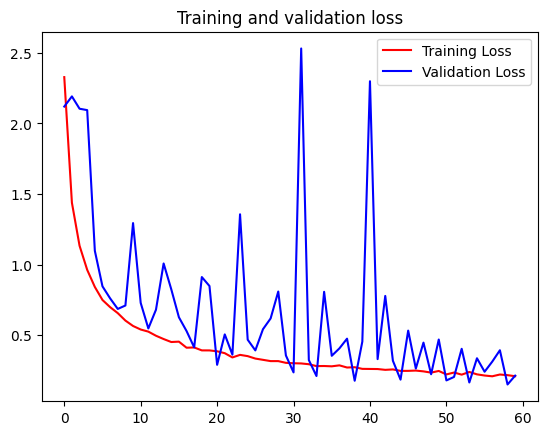

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))

/var/folders/s_/9hg8w5114qg8j3k5bh9xnv0w0000gn/T/ipykernel_34919/141321762.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))


test accuracy: 97.57390022277832


In [21]:
model.save('models/model11.h5')